# ANALYSIS IN JUPYTER NOTEBOOK

### Upload libraries and datasets

In [ ]:
import pandas as pd
import time
import json
import numpy as np
import ast
import datetime
import collections
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

Open your file in Jupyer notebook

In [2]:
df = pd.read_csv('NoMasks_July.csv', encoding='utf-8', engine='python')
df.shape

(32450, 35)

Get basic statistical info on the dataset

In [3]:
df.describe()

,Unnamed: 0,id,conversation_id,created_at,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,32450.000000,3.245000e+04,3.245000e+04,3.245000e+04,3.245000e+04,32450.000000,32450.000000,32450.000000,32450.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,11266.196888,1.283845e+18,1.283653e+18,1.594928e+12,5.499767e+17,1.010786,3.442465,10.844961,0.037596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7947.791209,2.495473e+15,7.002813e+15,5.949671e+08,5.608302e+17,9.918237,78.975799,266.871015,0.190221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.278117e+18,2.552949e+17,1.593562e+12,1.366600e+04,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4056.000000,1.282979e+18,1.282877e+18,1.594721e+12,3.950329e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10116.500000,1.283392e+18,1.283322e+18,1.594820e+12,7.072850e+17,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18228.750000,1.285831e+18,1.285764e+18,1.595401e+12,1.158305e+18,1.000000,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,26341.000000,1.290926e+18,1.290926e+18,1.596616e+12,1.288650e+18,852.000000,8271.000000,27544.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Get the top tweets in the dataframe

In [4]:
top = df['tweet'].value_counts().head(5)
top

#NoMasks                                                                                                                                                                                                                                                                       577
#nomasks                                                                                                                                                                                                                                                                        62
@GavinNewsom Importing for almost TWO Months, COVID19 patients from MEXICO at $30K-$100K each to INFLATE CA Stats & Keep Control over YOU. @DHSgov did not Know. Watch Riverside County Nurse WB: #NoMasks #RecallGavin2020\n https://www.youtube.com/watch?v=q2CtjwfFC6s …     27
PLAY & Let The Fun Begin 😱\nLike + RT + Click ⬇️\n https://www.reddeergames.com \nDid You see it? 🙈 pic.twitter.com/45a6EF3ixr                                                 

### Get the most shared posts from the dataset

In [5]:
top_posts = df[['username', 'tweet','created_at', 'retweets_count']].sort_values(by='retweets_count', ascending=False).head(10)
top_posts

,username,tweet,created_at,retweets_count
22829,bumblebee2907,Moaning about wearing a face covering for a sh...,1594726219000,8271
18009,leshieloves,My bus driver Dad died of Covid-19 because peo...,1594751916000,7651
23936,itsbr0gan,Just a little something for all the idiots on ...,1594722440000,5685
24520,beeckeerr,me seeing that #NoMasks is trending in the UK....,1594718328000,4120
12683,rl9631,Wearing mask will effect our health. Hypercapn...,1595034409000,1469
17911,borisjohnson_mp,Please show Desmond Swayne some respect - he's...,1594752714000,1408
9984,laylaalisha11,Surgical Masks do NOT Prevent Viruses includin...,1595255807000,1374
23872,niallmorganhay,The alt-right tweeting #NoMasks because they c...,1594722714000,1356
9217,neilclark66,Remember: The people behind the mandatory face...,1595316018000,932
24324,mybootsgeri,Retail workers on the 24th July when the #NoMa...,1594721093000,904


## Filter by dates

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

Unnamed: 0                  int64
id                          int64
conversation_id             int64
created_at                  int64
date               datetime64[ns]
time                       object
timezone                   object
user_id                     int64
username                   object
name                       object
place                      object
tweet                      object
mentions                   object
urls                       object
photos                     object
replies_count               int64
retweets_count              int64
likes_count                 int64
hashtags                   object
cashtags                   object
link                       object
retweet                      bool
quote_url                  object
video                       int64
near                      float64
geo                       float64
source                    float64
user_rt_id                float64
user_rt                   float64
retweet_id    

In [7]:
df.sort_values("date", ascending=True).tail()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
21,21,1288963738519969794,1288963738519969794,1596147877000,2020-07-31,00:24:37,CEST,1155984340234338305,aquarianqueen11,Aquarian Queen,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1155984340234338305', 'username'...",NaN,NaN,NaN,NaN
20,20,1288966927684116480,1288966927684116480,1596148638000,2020-07-31,00:37:18,CEST,1187881143607222272,lightsonpod,Leave The Lights On Podcast,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1187881143607222272', 'username'...",NaN,NaN,NaN,NaN
19,19,1288967144202412032,1288967144202412032,1596148689000,2020-07-31,00:38:09,CEST,2565685645,4wallsnow,Crisis =No Walls,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2565685645', 'username': '4Walls...",NaN,NaN,NaN,NaN
25,25,1288962704523304961,1288962704523304961,1596147631000,2020-07-31,00:20:31,CEST,1283055736277405696,tramifications,Black Sheep,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1283055736277405696', 'username'...",NaN,NaN,NaN,NaN
2766,2766,1290925778868330497,1290925778868330497,1596615664000,2020-08-05,10:21:04,CEST,472830024,usnato,US Mission to NATO,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '472830024', 'username': 'USNATO'...",NaN,NaN,NaN,NaN


In [8]:
start_date = '2020-07-14'
end_date = '2019-07-16'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
df_filtered = df.loc[mask]
df_filtered.shape

(0, 35)

## Accounts

Get the top accounts in the dataset

In [9]:
df.username.value_counts().head(10).reset_index()

,index,username
0,legalator,391
1,dieselsmighty,188
2,johntem82387976,129
3,lioncub199,123
4,lizirvin2,121
5,kathy_g417,117
6,d_mos77,114
7,crunchydoughnu1,113
8,charm91269403,112
9,meridianroseml,109


Get individual accounts in the dataset

In [10]:
accounts = df.copy()
accounts = accounts.drop_duplicates(['username'], keep='first')

See how many unique accounts are in the dataset

In [11]:
accounts.shape[0]

12784

In [12]:
accounts['place'].value_counts().head(10)
#.plot(kind='bar',x='place',y='number', color ='black')

Fred Meyer                1
The Beach on Nashville    1
Peter's Kill              1
Wheel Of Misfortune       1
Pacific Ocean             1
Name: place, dtype: int64

# Calculate top hashtags and mentions in text

Use regex to parse out the hashtags in the tweets and create a new column

In [13]:
import re
df['hashtags'] = df['tweet'].apply(lambda x: str(re.findall(r"#(\w+)", str(x))))

Functions for aggregating the hashtags and then visualizing the top 20 most frequent in the dataframe

In [14]:
def hashtags(col):
    
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x.lower()) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtag', 'number']).head(22).sort_values('number', ascending=True)
    return df

def bar_chart(tags, number, title):
    plt.figure(figsize=(10,5))
    plt.barh(tags, number)
    plt.title(title)
    plt.xlabel('number of times hashtag appeared')
    plt.show()

Filter out empty lists and use the functions to get the tags and then visualize them

In [15]:
new = df[df.hashtags.map(lambda x: len(x) >= 1)]
tags = hashtags(new.hashtags)

In [16]:
tags = tags[tags.hashtag != 'nomasks']
tags.head(22)

,hashtag,number
21,maga,334
20,covid,360
19,trump2020,362
18,masksdontwork,378
17,facemasks,405
16,covidhoax,407
15,freedom,419
14,nonewnormal,437
13,wearamask,440
12,muzzles,455


<Figure size 720x360 with 0 Axes>

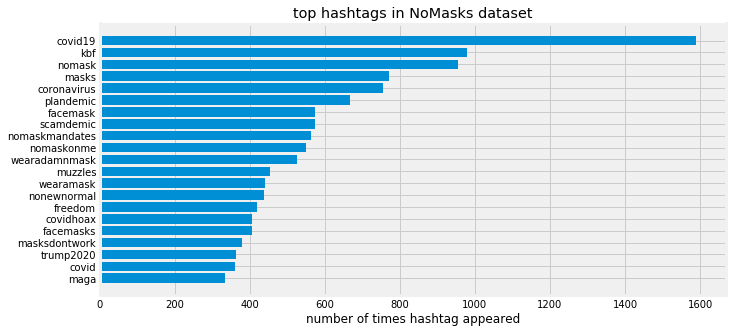

In [17]:
#visualize the top hashtags in the datasert
plt.figure(figsize=(10,5))
bar_chart(tags.hashtag, tags.number, 'top hashtags in NoMasks dataset')

Save the new dataframe to a csv

In [18]:
tags.to_csv('hash.csv')

Repeat the same process to parse out the mentions in the tweets and create a new column

In [19]:
df['tags'] = df['tweet'].apply(lambda x: str(re.findall(r"@(\w+)", str(x))))
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))
type(df.iloc[0].tags)

list

In [20]:
df['tags'] = [str(i).lower() for i in df['tags']]
df.head(5)

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tags
0,0,1288983803550203904,1288983803550203904,1596152661000,2020-07-31,01:44:21,CEST,1278426862440644610,tin_foil_hatter,TinFoilHatter,...,NaN,NaN,NaN,NaN,"[{'user_id': '1278426862440644610', 'username'...",NaN,NaN,NaN,NaN,[]
1,1,1288983405778964481,1288983405778964481,1596152566000,2020-07-31,01:42:46,CEST,45596436,cookiesinheaven,JJ the Barbarian wears a mask 😷,...,NaN,NaN,NaN,NaN,"[{'user_id': '45596436', 'username': 'cookiesi...",NaN,NaN,NaN,NaN,[]
2,2,1288983066623586306,1288981002849865728,1596152485000,2020-07-31,01:41:25,CEST,295045467,tammygregersen,I am somebody,...,NaN,NaN,NaN,NaN,"[{'user_id': '295045467', 'username': 'TammyGr...",NaN,NaN,NaN,NaN,[]
3,3,1288982500736368642,1288982500736368642,1596152350000,2020-07-31,01:39:10,CEST,70557856,ramzabehoulve,Ramza Behoulve,...,NaN,NaN,NaN,NaN,"[{'user_id': '70557856', 'username': 'RamzaBeh...",NaN,NaN,NaN,NaN,"['alexberenson', 'mlevitt_np2013', 'bag_ofsp_u..."
4,4,1288981432732459010,1288981432732459010,1596152096000,2020-07-31,01:34:56,CEST,35359652,tucsonvicki,Vicki Entrekin,...,NaN,NaN,NaN,NaN,"[{'user_id': '35359652', 'username': 'TucsonVi...",NaN,NaN,NaN,NaN,[]


In [21]:
def mention(col):
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['tags', 'number']).head(150).sort_values('number', ascending=False)
    return df

In [22]:
tags_m = mention(df.tags)
tags_m

,tags,number
0,realdonaldtrump,652
1,borisjohnson,345
2,potus,228
3,matthancock,178
4,gavinnewsom,170
...,...,...
145,anitaoakville,10
146,busydrt,10
147,carlanelsonmn,10
148,catturd2,10


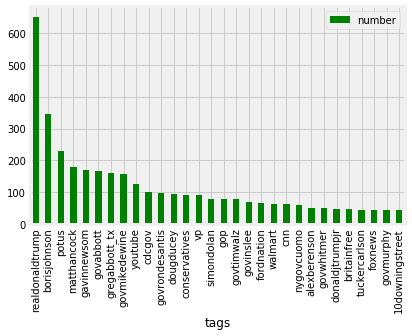

In [23]:
tags_m.head(30).plot(kind='bar',x='tags',y='number', color ='green')